Shah Rahim  
Intro to Data Science  
Intermmediate report  


# Topic : 2018's NBA MVP/Player Rank Prediction


## Overview:
For this project, I have chosen to mine and analyze data pertaining to the NBA. This topic has been an interest of  mine and I wanted to use data science concepts taught in class to embellish upon some interesting findings. The reason why this is an interesting topic is because basketball is one of the most popular sports in the world. The NBA is the world's most premier basketball league with a very large fan base. Fans are very keen on predicting who will be the next MVP or which team will be the next NBA champions. From my experience, many people make predictions soley based on their limited understanding of the game with little research to back up their claims. I howver will make a prediction with solid analytics and machine learning. Beginning this project, I wanted to pick a data source that had both credibility and volume. NBA.com was my first choice but I ran into many bottle necks with scraping the data, so basketball-reference.com and ESPN were the next best options. This notebook consists of my source code, and some the findings I across during my journey. 
    

## Note: 
After working on this intermeddiate report, I have realized that I will need to scrape more data for my sample dataset. This report is simply some analysis' that I could come up with, and my plan is to scrape more data following this report. I planned on scraping more data for this report, but I was affraid I would have to spend quite a bit of time debugging my code to accommodate the data, so I will scrape more data after this report.  

## Note 2: 
After the first intermmediate report, I concluded as mentioned in this report that the data I had was not sufficient for training. So I decided to rescrape my data from a better source so i decided to use **basketball-reference.com** as an additional resource as it had plenty of useful data. I am adding the final parts of my report to this intermmediate to show the evolution of my project from lacking to a better and more thought out report. I encourage the graders to go through the intermmediate report to see the flaws I had going into this project. **Part 2** will be highlighted as the final part of this project, and you may skip to that portion for my official final report if you wish. 


## Scraping (espn.com):

#### Source Code is attached in the zip file, please have a look 


Apologies for the long and cluttered python code. It is my first time scraping data on the web using python, so there are many shortcuts that I have yet to learn. This code was originally written mostly in the main method, but debugging became a big issue, so I wrote helper methods to help with debugging and code reusability.   


### Getting the top 10 players data: 
This dataset was scraped from the ESPN website. The first task that is being accomplished is scraping each season's top 10 players from the year 2008-2018. Seasons 2008-2017 will serve as training data. The data consists of: Player name, position, height, age, weight, team, team record, games played, games started, minutes played, field goals made versus attempted, field goal percentage, 3-points made versus attempted, free-throws made versus attempted, free-throw percentage, points per game...ect. The csv file for each season's data consists of categorical and quantative data types which will make for a variety of different visualizations. <br>


**Bottle Necks:**

- I originally attempted to scrape data from the official NBA website, and tried many times to extract the information I needed. Sadly, everytime I retrievd the contents of the webpage through the beautiful soup library, the data was missing. After many attempts I decided to scrape data from another website , thus I chose ESPN. 

- Each players row of data on the website had alternating class names for their class tags. Class names were either "odd...ect" or "even...ect". To solve this problem, I simply created separate containers for each class, and I had to scrape the odd class tags separatly from the even. I also alternated between containers to write the players stats in chronological order into the csv file.
    
- Certain players' age attribute was in a separate tag location than most players. This kept causing runtime errors and to fix this, I had to create a helper method isVetPlayer() which identified the players with this special case and lets the program know to look in another tag for their age
    
- Another special case was related to players such as Kevin Durant, Chris Paul and Deron Williams. When atempting to scrape their team acronyms for cetain seasons, the program crashed because their team tags were not existent. To solve this, I had to manually put in their team name.  

### Getting the team standings data
Scraping the team standings data was simpler than scraping the player stats. The source of this data is also from ESPN. I used a dictionary that kept the stats for each team. Each key was the acronym for the teams, and the value was the respective team's list of stats. This was very useful as I could easily look up team stats in O(1) time and insert certain information in the player stats such as team-record. Each csv file consists of all 30 NBA teams and their respective stats such as wins-losses, home wins, away wins,conference wins, points per game, difference and streak.

**Bottle Necks:**

- One big bottleneck was the runtime of this specific aspect of the code. When I was only scraping player data, the runtime was no more than 10 seconds. After adding the functionality of scraping team stats, the runtime was on average half of a minute. This was a problem as everytime I wanted to test small aspects of the code, I would have to wait quite a bit. This was one of the main reasons I aded a dictionary because otherwise the runtime would me much longer.

### Getting the MVP data
Last but not least, I scraped each season's MVP stats which is also from the ESPN website. This will serve as important training data for my model. I created a separate file for this data set for easy accessibility and readibility. 

**Bottle Necks:**

- One big bottleneck was again performance. Adding this functionality added 10 to 15 more seconds to the runtime of this program. Besides the runtime, the scraping the data for this dataset was quite straight forward and easy. 

## Scraping (basketball-reference.com):

### Getting MVP from 1956-2017 data:
After doing the intermmediate report, I decided to get more MVP data, so I scraped MVP data from 1956 until 2017. This will serve very useful in the training portion of this project.
\newline

**Bottle Necks:**

- There was not much of a bottle neck in scraping the data, but there was the issue of having the lack of data from certain columns from MVP's from earlier years. Other than this, scraping the MVP data was quite simple

### Getting MVP voting data:
This data is very important as it consisted of the top 10 players from each season and the respective scores they recieved on their MVP run, this allowed me to differentiate what characteristics MVPs had in comparison to the other top players 

**Bottle Necks:**

- Bottle necks for this portion of the scraping was having to deal with different types of tags. Certain data was inside 'td' tags while other data was inside 'a' tags and some data was also inside 'th' tags. Having these unpredictable cases with such a large dataset resulted in many runtime errors. Luckily I figured out a shortcut to this which made the debugging process not too difficult. 

### Getting NBA Leaders data:
This data is also very important because it serves as a good reference to saee which categories might be necessary to excel at to be MVP. This data dates back form 1970 to the present.
\newline

**Bottle Necks:**

- Bottle necks for this portion of the scraping was not much except the tag format was very confusing, so having to scrape the data took a few tries. The class name for the tag that contained this data was formatted differently so my attempts at scraping it was not successful until a few tries later.

### Getting League Winners data:
This data gave a nice overview of who was the mvp, rookie of the year, and which team were the champion for each year.

**Bottle Necks:**

- No Bottle necks for this 

### Getting Team Stats data:
This data is porbably one of the most important datasets for my topic as a player is nothing without his team, and analyzing team performance along with player performance is vital in predicting this year's MVP. I scraped the team stats from 1980 to the present.
\newline

**Bottle Necks:**

- This portion of my scraping had the most bottle necks. 50% of my time spent scraping from basketball-reference was this particular dataset. For some reason, when I got the contents of the webpage, it was not consistent with what was being hosted on the web. I tried almost everything to get the required data but to no avail. I had to use some different techniques such as manually extracting the data instead of using library functions. This caused the program to run quite slow.

### Getting Draft Picks data:
This dataset will help me analyze players from different angles. Points per game, assists, blocks..ect are great but looking at draft picks is also very useful. SO I scraped the top 10 draft picks for each year since 1970. 

**Bottle Necks:**

- No bottlenecks for this part

## Analysis and Visualization

The next part of this report consists of visualizations and some analysis made from these visualizations.

**Visualization 1** 

First lets us see any correlations in points per game for the MVPs of each year with their respective age. The code and visuals for this visualization is as follows:

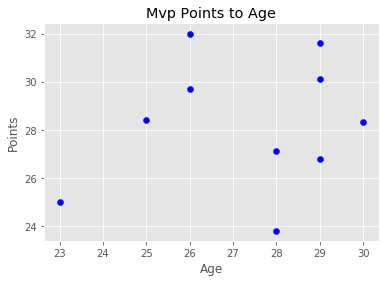

In [614]:
import csv
from matplotlib import pyplot as plt
from IPython.display import display, HTML
def getMvpCsvData(filename, index,data_type):
    lis = [0]*10    
    with open(filename, 'r')as csv_file:
        csv_reader = csv.reader(csv_file)
        i = 0
        for line in csv_reader:
            if(i>0):
                if(data_type=='f'):
                    lis[i-1] = float(line[index])
                elif(data_type=='i'):
                    lis[i-1] = int(line[index])
                else:
                    lis[i-1] = line[index]
            i+=1
        return lis
age = getMvpCsvData('mvp.csv',4,'i')
points = getMvpCsvData('mvp.csv',25,'f')
plt.scatter(age,points,label='age',color='b')
plt.xlabel('Age')
plt.ylabel('Points')
plt.title('Mvp Points to Age')
plt.show()

**Analysis 1**

From this scatter plot I do not see much of a correlation between the age of the MVP and the amount of points they scored. So I conclude that the age of the MVP and the points they scored per game has no correlation.

**Visualization 2**

Now let us look a histogram of different age groups of the MVPs 

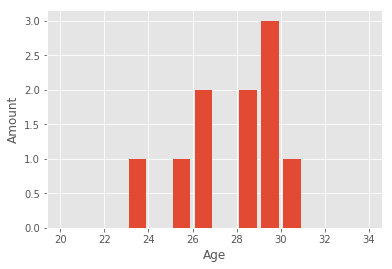

[30, 25, 26, 23, 28, 29, 26, 28, 29, 29]


In [615]:
age_bins = [0]*15
i = 0
for j in range(20,35):
    age_bins[i] = j
    i+=1
plt.hist(age,age_bins,histtype='bar',rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()
print(age)

**Analysis 2**

This histogram demonstartes that among the last 10 years of NBA MVPs, 30% of them were 29 years old and 70% were in the range of 26-29. This is a good insight as there is a more likely chance that a player in the range of 26-29 years old of being MVP.

**Visualization 3**

Now let us see if there is correlation between points scored per game of the MVP and their respective team record average. 

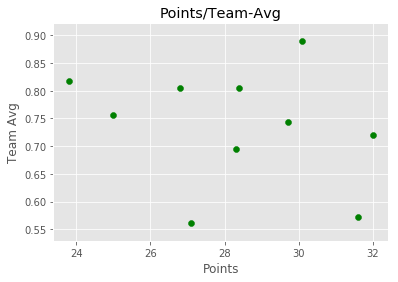

In [616]:
def getWinPer(team_record):
    lis = [0]*10
    j = 0
    k = 0
    for i in team_record:
        while(True):
            if(i[j]=='-'):
                break
            j+=1
        avg = float("{0:.3f}".format( int(i[0:j])/82))
        lis[k] = avg
        j = 0
        k+=1
    return lis
team_record = getMvpCsvData('mvp.csv',7,'s')
team_avg = getWinPer(team_record)
plt.scatter(points,team_avg,label='Points/Team-Avg',color='g')
plt.xlabel('Points')
plt.ylabel('Team Avg')
plt.title('Points/Team-Avg')
plt.show()

**Analysis 3**

To my surprise, there is no real correlation between the points per game for the MVP and his respective team-record average. This shows that a player's team can have a mediocre record all the while the MVP scores many points. An example of this is Russell Westbrook who scored 31.6 ppg and his team record is below 60%

**Visualization 4**

Now let us look at the poisitions of the MVPs. The goal is to see which position is more likely to fit into the MVP category.

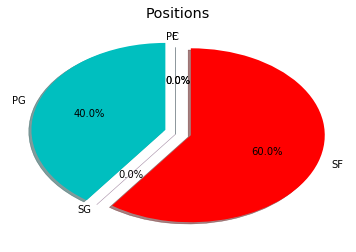

In [617]:
def posReduce(pos):
    lis = [0]*5
    for i in pos:
        if(i=='PG'):
            lis[0]+=1
        elif(i=='SG'):
            lis[1]+=1
        elif(i=='SF'):
            lis[2]+=1
        elif(i=='PF'):
            lis[3]+=1
        else:
            lis[4]+=1
    return lis
position = getMvpCsvData('mvp.csv',2,'s')
pos_list = posReduce(position)
activities = ['PG','SG','SF','PF','C']
cols=['c','m','r','b','g']
plt.pie(pos_list,
    labels=activities,
    colors = cols,
    startangle = 90,
    shadow = True,
    explode = (0.1,0,0.1,0,0),
    autopct='%1.1f%%')
plt.title('Positions')
plt.show()

**Analysis 4** 

What I found from this pie chart is that 100% of the last 10 years of MVPs were from only two positions: Point Guard and Small Forward. So I can safely conclude that it is more likely that 2018's MVP will belong to one of these two positions

**Visualization 5**

Looking into the data set, I saw that superstar Lebron James was MVP 4 times in the last 10 years. This is an unprecedented achievement and I want to look into his performance in the years he was MVP. 

So the next visualization is a stack plot of Lebrons performance in the categories: minutes played/game, rebounds/game, assists/game, blocks/game, steals/game, and points/game.

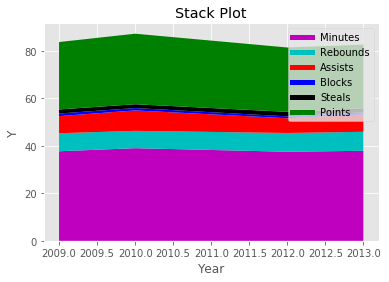

In [618]:
def getLebronMvpData(stat_list):
    lis = [0]*4
    lis[0] = stat_list[1]
    lis[1] = stat_list[2]
    lis[2] = stat_list[4]
    lis[3] = stat_list[5]
    return lis
years = getMvpCsvData('mvp.csv',0,'i')
minutes = getMvpCsvData('mvp.csv',10,'f')
rebounds = getMvpCsvData('mvp.csv',19,'f')
assists = getMvpCsvData('mvp.csv',20,'f')
blocks = getMvpCsvData('mvp.csv',21,'f')
steals = getMvpCsvData('mvp.csv',22,'f')
lebron_years = getLebronMvpData(years)
lebron_minutes = getLebronMvpData(minutes)
lebron_rebounds = getLebronMvpData(rebounds)
lebron_assists = getLebronMvpData(assists)
lebron_blocks = getLebronMvpData(blocks)
lebron_steals = getLebronMvpData(steals)
lebron_points = getLebronMvpData(points)
plt.plot([],[],color='m',label='Minutes',linewidth=5)
plt.plot([],[],color='c',label='Rebounds',linewidth=5)
plt.plot([],[],color='r',label='Assists',linewidth=5)
plt.plot([],[],color='b',label='Blocks',linewidth=5)
plt.plot([],[],color='k',label='Steals',linewidth=5)
plt.plot([],[],color='g',label='Points',linewidth=5)
plt.stackplot(lebron_years,lebron_minutes,lebron_rebounds,lebron_assists,lebron_blocks,lebron_steals,lebron_points,colors=['m','c','r','b','k','g'])
plt.xlabel('Year')
plt.ylabel('Y')
plt.title('Stack Plot')
plt.legend()
plt.show()

**Analysis 5**

This Stack plot does not demonstate much information, but it emphasizes one key point in Lebron's 4 years of reigning as the role of MVP: 

- Lebron has evolved into a team player which is evident by him scoring less points, and focusing on other aspects such as rebounds, and assists which have gradually increased.

So the take away is that to be an MVP, it does not mean that a player must score a definite amount, but they can still be MVP if they make up for the lack of points in other categories such as rebounds and assists.

**Visualization 6**

Now let us look at the percentage stats such as FG%, 3P% for all of the mvps:

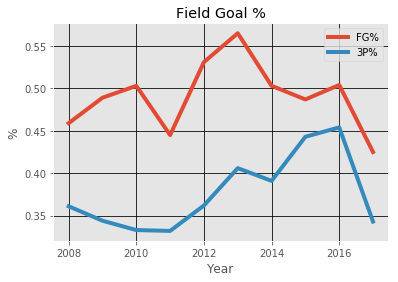

In [619]:
fg = getMvpCsvData('mvp.csv',12,'f')
three_pg = getMvpCsvData('mvp.csv',14,'f')
plt.plot(years,fg,label='FG%',linewidth=4)
plt.plot(years,three_pg,label="3P%",linewidth=4)
plt.title('Field Goal %')
plt.ylabel('%')
plt.xlabel('Year')
plt.legend()
plt.grid(True,color='k')
plt.show()

**Analysis 6**

What I gathered from this line graph is that 3P% should be atleast above 30% and overall FG% should be above 40%. What I also see is that certain players had a noticably less FG% and 3P% but still managed to become MVP.   

## Thoughts and Conclusions( Intermmediate Report):
I have concluded from this report that my dataset needs to be larger. I have spoken to my TA regarding this, and I was given the go-ahead to put together my report but I will need more data. The dataset I have so far is 11 seasons of the top 10 players, 11 seasons of the teams standings data, and the a file containing the last 10 MVPs. My goal is to increase this sample size by scraping the last 40 years of MVPs, including their respective top 10 players and if possible, the each years teams stats. This larger sample size will make for a more thorough and complete analysis. After I scrape more data, I hope to do more in-depth data visualizations and analysis. After this I wish to use machine learning libraries such as sklearn to learn and come up with a feasible model. One useful application of this topic is if I wish to make a fantasy league in any sport, I can scrape the data and use concepts of predictive analytics to come up with a great fantasy team.

# Part 2 (Final Report)

Now we will look at some visualizations after having more training data
## Analysis and Visualization(Part 2) <br><br>

Below code is used extensively throughout this report, so I thought I would put it at the begginning for ease of testing my notebook.

In [620]:
import statistics
import csv
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

def getCsvData(filename, index,data_type):
    with open(filename, 'r')as csv_file:
        csv_reader = csv.reader(csv_file)
        lis = []
        i = 0
        for line in csv_reader:
            if(i>0):
                if(not line):
                    continue
                if(data_type=='f'):
                   
                    lis.append(float(line[index]))
                elif(data_type=='i'):
                    lis.append(int(line[index]))
                else:
                    lis.append(line[index])
            i+=1
        return lis

## Points per game

Now lets examine the Points per game groups

Median: 25.75
Mean: 25.912903225806453


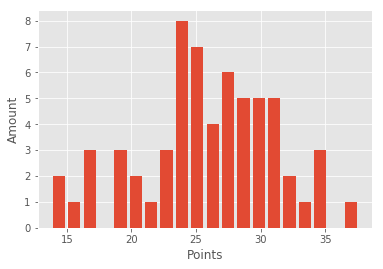

In [621]:
mvp_points = getCsvData('mvp_1.csv',8,'f')
print('Median: ' + str(statistics.median(mvp_points)))
print('Mean: ' +str(statistics.mean(mvp_points)))
age_bins = [0]*15
plt.hist(mvp_points,bins=20,histtype='bar',rwidth=0.8)
plt.xlabel('Points')
plt.ylabel('Amount')
plt.show()

**Analysis**

This histogram shows that a majority of the pointers per game/mvp is within the range of 24-31 points per game, with a median of 25.75 points per game and a mean of 25.9 points per game. So we can conclude that this year's MVP will have points in the range between 24-27 ppg. <br><br><br>

## Assists per game

Lets us now look at assists per game


Median: 4.9
Mean: 5.501612903225807


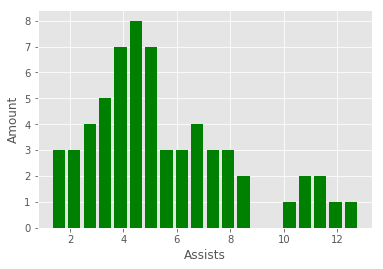

In [622]:
mvp_assists = getCsvData('mvp_1.csv',10,'f')
print('Median: ' + str(statistics.median(mvp_assists)))
print('Mean: ' +str(statistics.mean(mvp_assists)))
plt.hist(mvp_assists,bins=20,histtype='bar',rwidth=0.8, orientation='vertical', color = 'g')
plt.xlabel('Assists')
plt.ylabel('Amount')
plt.show()

**Analysis**

As per the histogram, the median assists per game is 4.9 with a mean of 5.5 assists per game. This histogram shows that it is rare to see players get above 9 assists per game. So it can be concluded that most of the MVPs prioritize their own scoring over setting up their teammates up for scoring. <br><br><br>

## Rebounds per game
Now lets look at the distribution of rebounds per game

Median: 10.8
Mean: 12.291935483870967


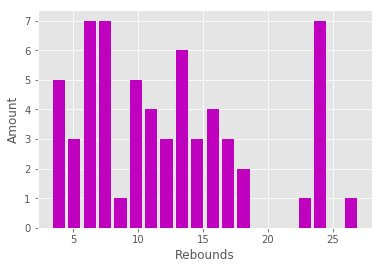

In [623]:
mvp_rebounds = getCsvData('mvp_1.csv',9,'f')
print('Median: ' + str(statistics.median(mvp_rebounds)))
print('Mean: ' +str(statistics.mean(mvp_rebounds)))
plt.hist(mvp_rebounds,bins=20,histtype='bar',rwidth=0.8, orientation='vertical', color = 'm')
plt.xlabel('Rebounds')
plt.ylabel('Amount')
plt.show()

**Analysis**

The average rebounds for the MVP's from the last 62 years is 12.29 rebounds per game. It is interesting to see that 11% of MVPs had 24 rebounds per game.  

## Note
The next few graphs are used to illustrate an interesting and important point. For those who are not strict followers of basketball and the NBA will usually attribute an MVP to being an amazing scorer, assister, rebounder, and maybe even dunker. Many believe that MVPs are all around gifted atheletes who breeze by competition. On the contrary, the next few visualizations illustrate an important point when attempting to predict the next MVP-- and that is you do not need to be a Michael Jordan to be an MVP. Many aspects are looked at when choosing an MVP <br><br><br>

## Points per game VS Assists per game  

Now we will look to see if there is any correlation between the amounts of points a player scores and the players team winning percentage. 

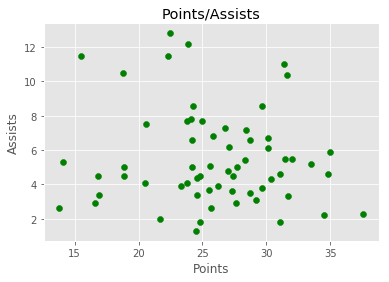

r-squared: 0.011934048124251678


In [624]:
points_per_game = getCsvData('mvp_1.csv',8,'f')
assists_per_game = getCsvData('mvp_1.csv',10,'f')
plt.scatter(points_per_game,assists_per_game,label='Points/Assists',color='g')
plt.xlabel('Points')
plt.ylabel('Assists')
plt.title('Points/Assists')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(points_per_game,assists_per_game)
print("r-squared:", str(r_value**2))

**Analysis**

To my surpise there is no correlation between the amounts of points an mvp scored vs the amounts of assists. There is a very important take away from this. This lack of correlation shows that to be an MVP, a player is not required to meet a threshold of points and assists. To be MVP, there are several other categories one can excel at to reach the top. <br><br><br> 


## Points per game VS Field goal percentage

Let us look at points per game vs field goal percentage

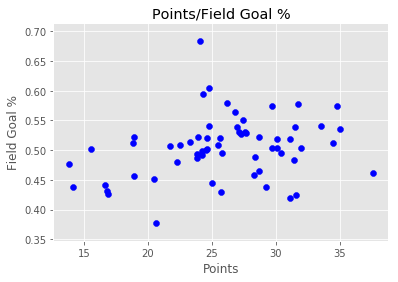

r-squared: 0.06657774655071803


In [625]:
field_per = getCsvData('mvp_1.csv',13,'f')
plt.scatter(points_per_game,field_per,label='Points/Field Goal %',color='b')
plt.xlabel('Points')
plt.ylabel('Field Goal %')
plt.title('Points/Field Goal %')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(points_per_game,field_per)
print("r-squared:", str(r_value**2))

**Analysis**

There is no real correlation between the amount of points a player scores, and their field goal percentage. This raises an interesting point that there are MVP's that scored less than 15 points per game and their field goal percentage was below 45%, and they still managed to be MVPs. The Stigma that MVP's must score over 25-26 points per game and that their field goal percentage must be higher than 50 percent is not true. <br><br><br>

## Points per game, Assists per game, and Win shares per game--3D

Now let us include another feature for further analysis. Along with the data set above, I will introduce **win shares/game** - which is the overall score a player gets for how much they contribute a team's **winnings** . The higher the win share, the more the player is helping the team win games. 

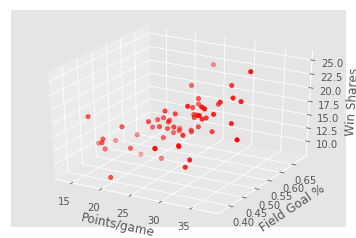

In [626]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
win_shares = getCsvData('mvp_1.csv',16,'f')
ax.scatter(points_per_game,field_per,win_shares, c='r', marker='o')
ax.set_xlabel('Points/game')
ax.set_ylabel('Field Goal %')
ax.set_zlabel('Win Shares')
plt.show()

**Analysis**

It is a little hard to tell, but some of the players who had scored around 15 points/game and had a field goal % < 45% have a decently high win share rating. So these types of MVP's focus less on their offense, and focus more on the offense of their teammates to secure more wins. So because of their efforts as a teamplayer they are awarded the MVP spot.<br><br><br>


## Points per game, Assists per game, Rebounds per game--3D

Lets look at another 3D plot seeing the correlation between poins/assists/rebounds


Average Rebounds per game for MVPs: 12.29193548387097


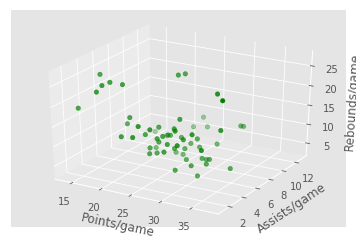

In [627]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
rebounds_per_game = getCsvData('mvp_1.csv',9,'f')
rebound_avg = sum(rebounds_per_game)/len(rebounds_per_game)
ax.scatter(points_per_game,assists_per_game,rebounds_per_game, c='g', marker='o')
ax.set_xlabel('Points/game')
ax.set_ylabel('Assists/game')
ax.set_zlabel('Rebounds/game')
print('Average Rebounds per game for MVPs: ' + str(rebound_avg))
plt.show()

**Analysis**

This graph has some very intersting plot points. If closely analyzed, this graph shows that if a player is lacking in two of the three features, they will excel at the other feature. Meaning, if a player has scored 15 points per game and has less that 3-4 assists per game, they will have over 20 rebounds per game! The average rebounds per game is 12 reb/game so this is quite impressive to get over 20 rebounds/game. It is very rare that we see an MVP excel at all three features. Also, a majority of the MVP's excel at 2 of the three features. <br><br><br>



## MVP Team's

Now let us examine a pie chart of MVP's and what team they belonged to.

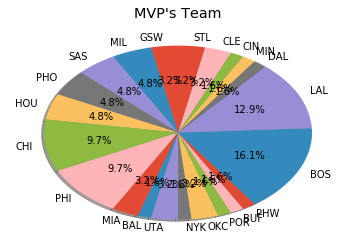

In [628]:
teams = getCsvData('mvp_1.csv',5,'s')
team_count = Counter(teams)
teams_set = set(teams)
teams_value = []
for i in teams_set:
    teams_value.append(int(team_count[i]))
plt.pie(teams_value,
    labels=teams_set,
    startangle = 90,
    shadow = True,
    autopct='%1.1f%%')
plt.title('MVP\'s Team')
plt.show()


**Analysis**

This pie chart is quite cluttered, but it illustrates that in the last 62 years of MVP's, nearly 50% of the the MVP's belong to only 4 teams! This is very interesting as it really narrows down where the next MVP might emerge from. There could be a few factors as to why there were so many MVP's from these four teams?<br><br><br>

## NBA Championship Teams (1955-2017)

To better understand why these four teams lets look at how many championships these teams have won since 1955.

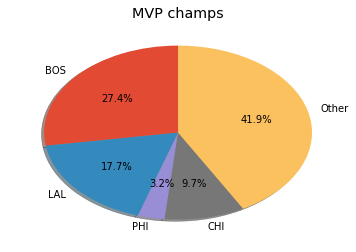

In [629]:
nba_champs = getCsvData('league_winners.csv',2,'s')
champs = []
champs_label = []
celtics_champs = nba_champs.count('Boston Celtics')
lakers_champs = nba_champs.count('Los Angeles Lakers')
sixers_champs = nba_champs.count('Philadelphia 76ers')
bulls_champs = nba_champs.count('Chicago Bulls')
four_champs = celtics_champs+ lakers_champs+ sixers_champs +bulls_champs
champs.append(celtics_champs)
champs.append(lakers_champs)
champs.append(sixers_champs)
champs.append(bulls_champs)
champs.append(62-four_champs)
champs_label.append('BOS')
champs_label.append('LAL')
champs_label.append('PHI')
champs_label.append('CHI')
champs_label.append('Other')
plt.pie(champs,
    labels=champs_label,
    startangle = 90,
    shadow = True,
    autopct='%1.1f%%')
plt.title('MVP champs')
plt.show()

**Analysis**

This was a very interesting finding. We find in the pie chart regarding MVP teams that four teams **(Boston Celtics, Los Angeles Lakers, Sixers, and Chicago Bulls)** Are homes to nearly 50% MVP's from the last 62 years. What is also interesting  in the pie chart above is that these very same teams also account for nearly 60 % of NBA Championship teams in the last 62 years. Meaning, these four teams combined have won almost 60 percent of the NBA championships in the last 62 years. This shows that NBA championship teams are more likely to produce an NBA mvp. <br><br><br>


## Win shares VS Win shares/48 games 

Now let us see a correlation between win shares and win shares per 48 games

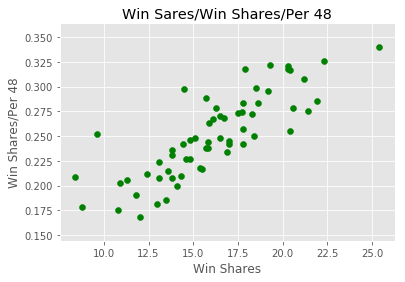

r-squared: 0.6725210712097678


In [630]:
win_shares = getCsvData('mvp_1.csv',16,'f')
win_shares_per = getCsvData('mvp_1.csv',17,'f')
plt.scatter(win_shares,win_shares_per,label='Win Sares/Win Shares/Per 48',color='g')
plt.xlabel('Win Shares')
plt.ylabel('Win Shares/Per 48')
plt.title('Win Sares/Win Shares/Per 48')
plt.show()
slope, intercept, r_val, p_value, std_err = stats.linregress(win_shares,win_shares_per)
print("r-squared:", str(r_val**2))

**Analysis**

As you can see by the graph, there is a correlation between an MVP's win shares and their win shares per 48 games. This graph shows us that the higher win share they had, the more consistent they were throughout the season. So it is imperative that a player maintain their performance throughout the season. Injuries are also a huge factor as to why some players are not able to maintain their performance.<br><br><br> 

## MVP age groups

Now lets look at the age groups 


 Average age for an MVP is: 27


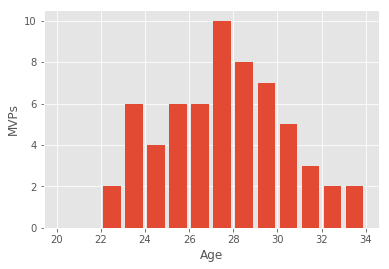

In [631]:
mvp_age = getCsvData('mvp_1.csv',4,'i')
age_avg = int(sum(mvp_age)/len(mvp_age))
print(" Average age for an MVP is: " + str(age_avg))
age_bins = [0]*15
i = 0
for j in range(20,35):
    age_bins[i] = j
    i+=1
age_count = Counter(mvp_age)
plt.hist(mvp_age,age_bins,histtype='bar',rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('MVPs')
plt.show()


**Analysis**

This histogram shows that the the average age for an MVP is 27 years old. The question is why is this the case? Accordding to (thestatszone.com), the prime age for an olympic athlete is 26.2 years of age:
<img src="files/age_olympics.png"><br><br><br>
Source: https://www.thestatszone.com/olympic-sports-how-does-peak-age-vary<br><br>
NBA players are the elite athletes in their respective sports, so this study shows that the reason MVP's are mostly around the age of 26-28 is because an athlete reaches his prime at 26.2 years and starts to gradually slow down.<br><br><br>The following graph further shows the performance of MLB players based on age groups. Although baseball is a different sport, the concepts are all the same. All athletes in their respective field experience the same prime years, and experience the same gradual decrease in performance when they hit their 30s. <br><br>
<br><img src="files/greatPlayers.jpg"><br> 
Source: https://www.fangraphs.com/blogs/how-do-star-hitters-age/<br><br>
What you can see from the chart above is that even hall of famers in baseball could not maintain the same performance as they did whenthey were in their mid to late 20s. This makes it clear that it is highly unlikely for a player who is above the age of 30-32 years to become MVP. SO therefore I conclude that any players above the age of 32 is highly unlikelt to become mvp.

## Kareem Abdul Jabbar career analysis
The further understand that players' performance slows down after the age of 29, lets look at the MVP stats for Kareem Abdul Jabbar who is leading the NBA with most MVP wins with **6**.

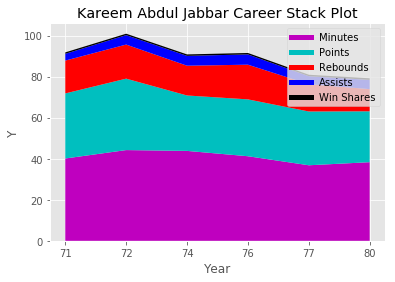

In [632]:
def getYear(year):
    return year[5:]
years = getCsvData('mvp_1.csv',0,'s')
mvp_name = getCsvData('mvp_1.csv',2,'s')
minutes = getCsvData('mvp_1.csv',7,'f')
points = getCsvData('mvp_1.csv',8,'f')
rebounds = getCsvData('mvp_1.csv',9,'f')
assists = getCsvData('mvp_1.csv',10,'f')
win_shares = getCsvData('mvp_1.csv',15,'f')
kareem_years = []
kareem_min = []
kareem_points = []
kareem_reb = []
kareem_ass = []
kareem_win = []
index = 0
kareem_index = []
for i in mvp_name:
    if(i == 'Kareem Abdul-Jabbar'):
        kareem_index.append(index)
    index+=1
for i in reversed(range(len(kareem_index))):
    kareem_years.append(getYear(years[kareem_index[i]]))
    kareem_min.append(minutes[kareem_index[i]])
    kareem_points.append(points[kareem_index[i]])
    kareem_reb.append(rebounds[kareem_index[i]])
    kareem_ass.append(assists[kareem_index[i]])
    kareem_win.append(win_shares[kareem_index[i]])   
plt.plot([],[],color='m',label='Minutes',linewidth=5)
plt.plot([],[],color='c',label='Points',linewidth=5)
plt.plot([],[],color='r',label='Rebounds',linewidth=5)
plt.plot([],[],color='b',label='Assists',linewidth=5)
plt.plot([],[],color='k',label='Win Shares',linewidth=5)
plt.stackplot(kareem_years,kareem_min,kareem_points,kareem_reb,kareem_ass,kareem_win,colors=['m','c','r','b','k','g'])
plt.xlabel('Year')
plt.ylabel('Y')
plt.title('Kareem Abdul Jabbar Career Stack Plot')
plt.legend()
plt.show()

**Analysis**

As shown in the stack plot above, we can see that Kareem Abdul Jabbar's performance slowed down each year in every aspect. He still managed to be crowned MVP but his last MVP ring which was awarded at the age of 32 did not siginify his best career performance. This graph is a perfect representation of why MVP's are mostly in the range of 26-29 years og age and struggle to become MVP after that.<br><br><br>


## MVP Demographics

Let us now look at the demographics of the MVP's by State

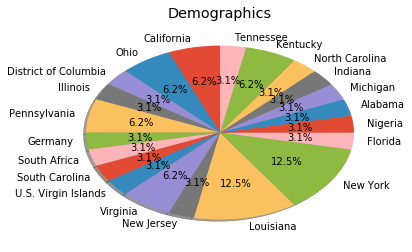

In [633]:
born = getCsvData('mvp_1.csv',19,'s')
name = getCsvData('mvp_1.csv',2, 's')
index = 0
born_dic = {}
states = []
names = []
state_names = []
for i in born:
    born_dic[name[index]] = i
    index+=1
for key in born_dic:
    states.append(born_dic[key])
state_count = Counter(states)
ind = 0
for key in state_count:
    state_names.append(key)
    names.append(state_count[key])
plt.pie(names,
    labels=state_names,
    startangle = 90,
    shadow = True,
    autopct='%1.1f%%')
plt.title('Demographics')
plt.show()

**Analysis** 

From the pie chart, 25% of MVP's come from only 2 states! There have been MVP's from 21 different places around the world, but interestingly, 1/4 come from either New York or Louisiana. Basketball is one of the most popular sports in the world, and to know that only 2 states account for 25% of MVP's in the last 62 years is quite interesting. The question is what is so special about these two states that produce 25% of the MVP's from the last 6 to 7 decades? 
<img src="files/nykworth1.png"><br> 
Source: https://www.forbes.com/pictures/mli45fflmj/1-new-york-knicks/#3382942f2de0<br><br>
In study done by Forbes.com in 2016, the New York Knicks are ranked 1 as the most valuable team in the NBA. Their networth is **3 billion** dollars and they rack in **300 million dollars** of revenue each year! The reason this is important is because this shows how popular basketball is in New York 
<img src="files/knicks_income.png"><br>
Source: https://www.forbes.com/sites/baileybrautigan/2016/03/21/where-all-that-money-comes-from-nba-team-valuations-visualized/#3733bd89444f<br><br> 
The New York Knicks large dominance over the market share shows the popularity of basketball in New York. This will in turn motivate and produce great players.In addition, according to bleachreport.com, the state of New York is **ranked number 3** in producing the best high school players.<br><br><br><br>  Also, in a study conducted in 2010, New York was **ranked third** by Gross Domestic Product with a **GDP of 1.2 Trillion dollars!** New York accounts for 8.1 percent of the total GDP in the United States. The below picture gives a nice visualization of how large New York's economy is in comparison to other states. 
<img src="files/ny_gdp.png"><br>
Source: http://www.businessinsider.com/how-much-each-state-contributes-to-the-us-economy-2015-9<br><br> 
Lasty, New York ranks **third** in incomer per two-bedroom housing. This further explaines that New York has more income for most household, who then could provide more opportunities and resources for kids to excel in athletics. 
<img src="files/newyork_income.png"><br>
Source: https://www.citylab.com/equity/2015/05/mapping-the-hourly-wage-needed-to-rent-a-2-bedroom-apartment-in-every-us-state/394142/<br><br> 
Lousiniana does not compare to New York in GDP, but it is **ranked 5** by bleachreport in 2017 as producing some of the most talented athletes. This is definitly a factor as to why Louisiana has had so many MVP's. <br><br><br>

## MVP Positions

Lets look at the distribution of NBA positions

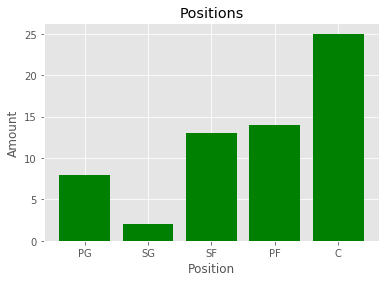

In [634]:
def posReduce(pos):
    lis = [0]*5
    for i in pos:
        if(i=='PointGuard'):
            lis[0]+=1
        elif(i=='ShootingGuard'):
            lis[1]+=1
        elif(i=='SmallForward'):
            lis[2]+=1
        elif(i=='PowerForward'):
            lis[3]+=1
        else:
            lis[4]+=1
    return lis
position = getCsvData('mvp_1.csv',18,'s')
real_position = []
for i in position:
    lis = i.split('and')
    real_position.append(lis[-1])
pos_list = posReduce(real_position)
plt.style.use('ggplot')
pos = ['PG', 'SG', 'SF', 'PF', 'C']
plt.bar(pos, pos_list, color='green')
plt.xlabel("Position")
plt.ylabel("Amount")
plt.title("Positions")
plt.show()
x = (pos_list[4] + pos_list[3])/62
years = []
big_men = []
y = getCsvData('mvp_1.csv',0,'s')
for i in reversed(range(len(y))):
    years.append(getYear(y[i]))
    lis = position[i].split('and')
    if('PowerForward' in lis or 'Center' in lis):
        big_men.append(1)

**Analysis**

This bar graph shows that 63 percent of the MVP's from the last 60 years were big men. Furthermore, the first **30 years** of MVPS from **1955-1985** were all Big men! The question is why were big men soo dominant, especially from the years 1955-1985?
The following gif illustrates some good insight as to why this was the case
<br><br><br> **Please** open the link to the Gif link below, that illustrates the height changes over the years. 
Source: http://www.tothemean.com/images/2014.08.27.viraj/seasons.height-75c9c0d1.gif<br><br>
After examining the Gif link from above, from 1955-1985, most of the players were smaller guys, and there were hardly any big men at the time. So how does this explain the large percentage of big men as MVP's? Well for one, less big men means there are less big men that are defending and giving trouble to big men that were playing at the time. Second, there was larger percentage of smaller players, so these smaller players were easily dominated by the big men. This gave big men an open floor to dominate over the smaller players--very much like the David and Goliath type scenario. Furthermore, during the mid 1980's a larger distribution of big men started playing in the NBA which then made it harder to succeed as a big since there was more competition. <br><br><br><br><br><br>

# Machine Learning

### Prediction
There were many considerations as to what would the main focus of my prediction. The orginal plan was to predict the MVP but sadly there was not a large enough data set for this task. 

**Challenge** 

- 62 years of MVP's did not produce enough rows or data to make a proper Machine Learning model.

**Opportunity**

- When I was scraping my data from Basketball-reference.com. One set of data that I scraped was the voting stastics for each years MVP. This data set consists of the top 10 to 15 players who were considered in the race for the MVP spot. Each player from the voting list for each year was given a certain amount of voting points based on their performance. Features such as Points per game, Assists per game, and Rebounds per game has a hefty influence on the amount of voting points a player received. After receiving voting points, a player is then ranked from best to worst.    

- For each year, the players were given a rank from lets say 1-10 where the 1st ranked player earned the most points and was awarded the MVP crown. The second ranked player was a close second and so on. 

**Decision** 

- I decided to look at this voting data set for my Machine Learning portion of this project. With more or less 60 years of MVP's and 10 to 15 players in the voting list per year gave me approximately 960 rows of data. 

## Features that matter:

In my attempt to search for the best features for my Machine learning Models, I plotted some features to see which ones had a good coreleation between a players rank and the feature. So for Points per game, I wanted to see if the higher ranked player you are, will that mean you will score more points. I did this for many features and this was my finding.  

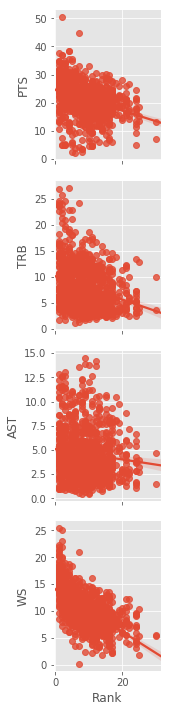

In [635]:
import pandas as pd
import numpy as np
import pandas_ml as pdml
import sklearn.datasets
import seaborn as sns

voting = pd.read_csv('voting_mvp.csv',usecols=[0,10,11,12,18])
d = pd.read_csv('voting_mvp.csv',usecols=[10,11,12,18])
target = []
for index, row in voting.iterrows():
    if(row['Rank']<=3):
        target.append(0)
    elif(row['Rank']>3 and row['Rank']<=7):
        target.append(1)
    else:
        target.append(2)
final_df = d.as_matrix()
final_tar = np.array(target)
%matplotlib inline
sns.pairplot(voting,x_vars = ['Rank'],y_vars=['PTS','TRB','AST','WS'],kind='reg')

**Analysis**

After extensive testing on which features would best serve my Machine learning model, I came to the conclusion that the features:

- Points per game
- Assists per game
- Total Rebounds per game 
- Win Shares per game 

<br><br>These four features demonstrate sufficient negative correlation with higher ranked players(players with ranks 1-5) yielding more of each feature. In other words, if you are ranked i.e 1-5, you most likely scored more points, grabbed more rebounds, dished out more assists, and most evidently received a higher win share rating. Please keep remember, if you are a rank 1 player, you recieved the most voting points for that MVP year. 
<br>

I decided to predict a classification. I looped through all of the rows in my data set, and classified them as:<br><br>

### Classification:<br>
-    **Rank range (1,3)**  I classified them as a **Tier 1**<br>
-    **Rank range (4,7)**  I classified them as a **Tier 2**<br>
-    **Rank Below 7**  I classified them as a **Tier 3**<br>

**Class Tier 1**

- Is the top tier player who was either MVP or a runner up for the MVP position.

**Class Tier 2** 

- Is the second tier player who performed tremendously during the season but was short of having a real shot at MVP

**Class Tier 3** 

- Is the third teir for players who separates themselves from many of the players in the NBA but does not have sufficient stats to be MVP 
    
    
## Importance of Tiers:

After doing extensive research, I found that to predict the MVP, it is best to break the Top players from each year in separate groups. The Tier classes do a great job separating the true Top runners for the MVP spot and players who performed well but not good enough. If I can predict what Tier class a player will be in, this will most certainly narrow down the process of predicting the MVP. As mentioned above, the Tier classification is based on four , features, **Points per game**,  **Rebounds per game** , **Assists Per game** , and most importantly, **Win shares per game**  
    
Now that I have my dataset, I will showcase my experiments with different machine learning models, and which one best suits my dataset. 


## Logistic Regression

In [636]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

log_reg = []
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(final_df,final_tar,test_size = 0.4)
    logreg = LogisticRegression()
    logreg.fit(x_train,y_train)
    y_pred = logreg.predict(x_test)
    x_acc = metrics.accuracy_score(y_test,y_pred)
    log_reg.append(x_acc)
    
print(sum(log_reg)/len(log_reg))

0.6667287234042556


## Result: 66.6% accuracy

After 100 different test and train splits, the mean accuracy when using Logistic Regression is 66%. Because I have 3 different classes, random guesing gives a 33% chance of guessing the correct class. This machine learning model racks in 66% which is quite decent for a 3 class classification. I did some research and found out that Logistic Regression is preferable for binary classifications. Although this is evidently true, I was quite surprised by the fact that this Model was able to still hit almost 70% accuracy with three different classes.<br><br>

Next we will look at the K nearest neighbor model to see if we get a better accuracy.<br><br>


## K Nearest Neighbor

Text(0,0.5,'Testing Accuracy')

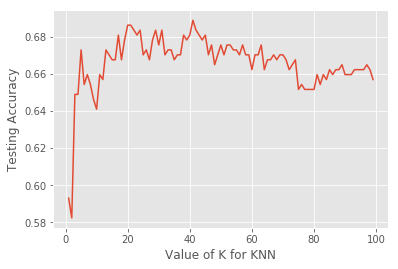

In [637]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,100)
scores = []
x_train,x_test,y_train,y_test = train_test_split(final_df,final_tar,test_size = 0.4)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    
%matplotlib inline

plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**Best K Value**

After trying different values of K, the graph demonstrates that the best value of K is between the range of **20-25**. For best results, I chose to choose k to be **23**

In [638]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split

k_nn = []
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(final_df,final_tar,test_size = 0.4)
    knn= KNeighborsClassifier(n_neighbors = 23)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    x_acc = metrics.accuracy_score(y_test,y_pred)
    k_nn.append(x_acc)
    
print(sum(k_nn)/len(k_nn))

0.6673138297872344


## Result: 66.9% accuracy

After 100 different test and train splits, the mean accuracy when using K Nearest Neighbor is 66.9%. This is slightly better than Logistic Regression, so thus far, KNN is my preferred model to predict the Tier of a player. 

Next we will look at the Decision Tree model to see if we get a better accuracy. I came in with the expectation that decision trees would yeld the best results, but I wasunpleasently surpised by the lack of predictive power Decision trees displayed. <br><br><br>


## Decision Trees:

Text(0,0.5,'Testing Accuracy')

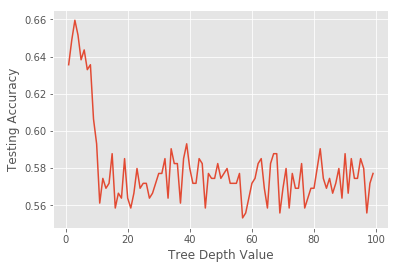

In [639]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test = train_test_split(final_df,final_tar, stratify=final_tar,test_size=0.4)
t_range = range(1,100)
train_scores = []
test_scores = []
for t in t_range:
    tree = DecisionTreeClassifier(max_depth = t)
    tree.fit(x_train,y_train)
    train_score = tree.score(x_train,y_train)
    train_scores.append(train_score)
    test_score = tree.score(x_test,y_test)
    test_scores.append(test_score)
%matplotlib inline

plt.plot(t_range,test_scores)
plt.xlabel('Tree Depth Value')
plt.ylabel('Testing Accuracy')

### Decision Tree Depth
<br>When I tested the Decision Tree model on my data set, I wanted to apply as much **pruning** as I could to prevent overfitting, and to save my PC from computing unnecessary splits. My method of pruning was to utilize ** Max Tree Depth ** to better understand how deep should my decision tree split off to maximize result as minimize overfitting. <br><br>

As you can see in the graph above, running depths past **4-5 splits** would not add any value to my models accuracy. So I decided to leave the depth at **4**. After setting the max depth of my Decision tree to 4, these are the results I got.


In [640]:
from sklearn.tree import DecisionTreeClassifier
tree_avg = []
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(final_df,final_tar, stratify=final_tar,test_size=0.4)
    tree = DecisionTreeClassifier(max_depth = 4)
    tree.fit(x_train,y_train)
    score = tree.score(x_test,y_test)
    tree_avg.append(score)                    
print('Mean Accuracy for Decision Tree is: ' + str((sum(tree_avg)/len(tree_avg))))

Mean Accuracy for Decision Tree is: 0.6510584569095212


## Result: 64.4% accuracy

After running test and train splits with a max depth of **4** , The mean accuracy after 100 interations is **64.4%** . My thoughts on these results are very dissapointing. We learned in class that Classification trees have the power to yeld very accurate results. My though going into training this model was accuracy around 70%. But to my suprise, the mean accuracy of 64.4% is the best I could get.   

## Related work

**Paper 1: Predicting sports events from past results**

Source: http://referaat.cs.utwente.nl/conference/14/paper/7226/predicting-sports-events-from-past-results.pdf

A paper written by Douwe Buursma titled "Predicting sports events from past results" is en excellent read when trying to predict sporting events, sporting outcomes based on past results. Just a quick overview, Douwe brushes upon which key aspects of a gaming event really add value to predicting futire events. He emphasizes that accurate match history would do wonders when training a machine learning model. He also goes over different classifications and regression techniques that can be used to combine a solid prediction. I highly recommend any student from future classes to read this paper, if they are attempting to predict something in the athletics department.

**Paper 2: Predicting outcome of soccer matches using machine learning**

Source: https://pdfs.semanticscholar.org/7d1f/8ff04a87b29eddc8eb84300d98d7dd3ffe30.pdf

Another paper written by Albina Yezus titled "Predicting outcome of soccer matches using machine learning" is also a very useful resource for predicting sporting outcomes with the help of machine learning. Albina goes over tools very similar to the ones I used to visualize and predict events. She very concisely gives insight on which machine learning models would apply to which situation. I was happy to find out that the technique of classification greatly suits sporting predictions, which I used as my overall model. I also recommend this article for any future students who are looking to predict sporting events with the help of machine learning models.


## Conclusion

When I was originally trying to predict MVP, I was not able to do so because of the lack of time and proper planning. This was a great learning experience for me in terms of understanding the complexity of being a data scientist. I see that they are the highest paid IT professionals is the world, and after this report, I am not at all surprised. With the data that I had, I was able to find some interesting insights on what attriutes MVP's share in common. I was able to narrow down what age group most MVP lie in, that their stats should be overall good, or atleast excelling at on of the features. I was able to see where MVP's were born and why certain states produce more MVPs than others. Then I tried to use MVP voting statistics to get better insight on whether my model could predict players who are **most likely** going to be MVP. After trying the three different Classification models, they more or less predict in the same range. Still the best model thus far is **KNN** with a **K value of 23**. I am confident that with this model will more or less narrow down the top 3 players from the leagues 400 players. It will give a ball park on  which handful of players will most likely be MVP just by focusing on their most key features which **Points per game**, **Rebounds per game**, **Assists per game**, and most importantly, **Win shares per game**. With these key features with which I was able to see a direct correlation where players ranked 1-3 had higher states in all categories. The lower ranked players (4-and so on) showed a decrease in all of these features. I could have definilty used this prediction and gone further with it to narrow down which player would be MVP. I wanted to use KNN on realtime data, but unfortunalty I have run out of time. My plan was to use my model and predict which players were in **Tier 1** which would narrow down significatly who would be this years MVP. My apologies for not predicting the MVP exactly, but I am happy that I am able to predict the top thee players who would be most likely an MVP with an accuracy of **66.9%**.

## Acknowledgments

**First**

- I would like to give my wamrest thanks to Professor De Melo, and TA's Hanxiong and Shahab for a very insightful and enlightening class experience. Without your guys guidance and hardwork, I would not have put this report together. I went into the class with 0 data science and machine learning experience, but this class was constructed in such a way that we students would learn practically how to apply data science and machine learning techniques. After this class, I am deciding to take my career route in data science and machine learning. I now understand the value this career path has, and how rewarding it will be in the near future. Thank you all once again.

**Programming Languages**

- Python 3.6

**Libraries and modules**

- Beautiful Soup
- Matplot lib
- IPthon.Display
- Scipy
- Numpy
- mpl_toolkists.mplot3d-->Axes3D
- Pandas
- Pandas_ml
- Sklearn.dataset
- Seaborn
- Sklearn.linear_model-->LogisticRegression
- Sklearn.model_selection-->train_test_split
- Sklearn.neighbors-->KNeighborsClassifier
- Sklearn-->metrics
- Sklearn.tree-->DecisionTreeClassifier


### References:
- espn.com
- basketball-reference.com
- https://www.thestatszone.com/olympic-sports-how-does-peak-age-vary
- https://www.fangraphs.com/blogs/how-do-star-hitters-age/
- https://www.forbes.com/pictures/mli45fflmj/1-new-york-knicks/#3382942f2de0
- https://www.forbes.com/sites/baileybrautigan/2016/03/21/where-all-that-money-comes-from-nba-team-valuations-visualized/#3733bd89444f
- http://www.businessinsider.com/how-much-each-state-contributes-to-the-us-economy-2015-9
- https://www.citylab.com/equity/2015/05/mapping-the-hourly-wage-needed-to-rent-a-2-bedroom-apartment-in-every-us-state/394142/
- http://www.tothemean.com/images/2014.08.27.viraj/seasons.height-75c9c0d1.gif
- http://scikit-learn.org/stable/modules/tree.html
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- http://referaat.cs.utwente.nl/conference/14/paper/7226/predicting-sports-events-from-past-results.pdf
- https://pdfs.semanticscholar.org/7d1f/8ff04a87b29eddc8eb84300d98d7dd3ffe30.pdf